In [0]:
%python 

#Importando biblioteca 
from pyspark.sql import SparkSession    
                    
# Criando a sessão Spark por segurança
spark = SparkSession.builder.appName("DatabricksETL").getOrCreate()   
    
# Criando esquema Bronze caso não exista
spark.sql("CREATE SCHEMA IF NOT EXISTS bronze")    

# Carregando o dataset escolhido
bronze_path = "dbfs:/FileStore/shared_uploads/doamaral.amanda@gmail.com/StudentPerfomanceFactors-1.csv" 

#Lendo CSV e criando DataFrame Bronze
df_bronze = (spark.read
    .option("header", "true")
    .option("inferSchema", "true")  
    .option("sep", ",") #Definindo delimitador
    .csv(bronze_path)) #Indicando o caminho do dataset

# Criando tabela Bronze (Raw Data)
df_bronze.write.format("delta").mode("overwrite").saveAsTable("bronze.student_performance")

# Exibindo dados iniciais
display(df_bronze)

Hours_Studied Attendance Parental_Involvement Access_to_Resources Extracurricular_Activities Sleep_Hours Previous_Scores Motivation_Level Internet_Access Tutoring_Sessions Family_Income Teacher_Quality School_Type Peer_Influence Physical_Activity Learning_Disabilities Parental_Education_Level Distance_from_Home Gender Exam_Score 23 84 Low High No 7 73 Low Yes 0 Low Medium Public Positive 3 No High School Near Male 67 19 64 Low Medium No 8 59 Low Yes 2 Medium Medium Public Negative 4 No College Moderate Female 61 24 98 Medium Medium Yes 7 91 Medium Yes 2 Medium Medium Public Neutral 4 No Postgraduate Near Male 74 29 89 Low Medium Yes 8 98 Medium Yes 1 Medium Medium Public Negative 4 No High School Moderate Male 71 19 92 Medium Medium Yes 6 65 Medium Yes 3 Medium High Public Neutral 4 No College Near Female 70 19 88 Medium Medium Yes 8 89 Medium Yes 3 Medium Medium Public Positive 3 No Postgraduate Near Male 71 29 84 Medium Low Yes 7 68 Low Yes 1 Low Medium Private Neutral 2 No High School Moderate Male 67 25 78 Low High Yes 6 50 Medium Yes 1 High High Public Negative 2 No High School Far Male 66 17 94 Medium High No 6 80 High Yes 0 Medium Low Private Neutral 1 No College Near Male 69 23 98 Medium Medium Yes 8 71 Medium Yes 0 High High Public Positive 5 No High School Moderate Male 72 17 80 Low High No 8 88 Medium No 4 Medium High Private Neutral 4 No College Moderate Male 68 17 97 Medium High Yes 6 87 Low Yes 2 Low High Private Neutral 2 No High School Near Male 71 21 83 Medium Medium Yes 8 97 Low Yes 2 Medium Medium Public Positive 4 No High School Near Male 70 9 82 Medium Medium Yes 8 72 Medium Yes 2 Medium Medium Private Positive 3 No Postgraduate Near Male 66 10 78 Medium High Yes 8 74 Medium Yes 1 Low Medium Private Neutral 4 No Postgraduate Near Male 65 17 68 Medium Medium No 8 70 Medium Yes 2 Medium Medium Private Positive 4 No High School Near Female 64 14 60 Medium Low Yes 10 65 Low Yes 0 High Medium Private Positive 3 No College Near Male 60 22 70 Low Medium Yes 6 82 Medium Yes 1 Low High Public Neutral 3 No High School Near Female 65 15 80 Medium Medium Yes 9 91 Low Yes 3 Low Medium Public Positive 2 No College Moderate Female 67 12 75 Medium High Yes 7 58 Medium Yes 3 Medium Medium Private Positive 4 No College Near Male 66 29 78 Medium Medium No 5 99 High Yes 0 High Medium Public Negative 1 No High School Moderate Female 69 19 99 Medium High No 6 84 Medium Yes 1 Medium High Public Neutral 3 No High School Near Male 72 20 74 Medium High No 8 89 Low Yes 1 Medium Medium Public Negative 2 No College Moderate Female 66 11 78 High Medium Yes 8 100 High Yes 1 Low Medium Public Neutral 3 No High School Moderate Male 66 17 65 Low High Yes 5 75 Medium Yes 2 Low Medium Public Positive 3 No High School Near Female 63 21 62 High Low Yes 6 54 High Yes 0 High High Public Positive 3 No Postgraduate Far Male 64 13 91 Low Medium No 6 90 Medium Yes 1 High Medium Public Negative 2 Yes High School Moderate Female 65 22 83 High High Yes 6 94 Medium Yes 0 High Medium Public Neutral 2 No College Moderate Male 71 16 90 Medium Medium No 4 58 Medium Yes 1 Low Medium Public Neutral 3 No High School Moderate Female 66 18 66 High High No 4 51 Low Yes 2 Low Medium Private Neutral 2 No College Near Male 64 16 83 Low Medium No 6 57 Medium Yes 0 High Low Public Positive 4 Yes High School Near Female 63 31 70 Medium High Yes 7 66 Medium Yes 1 High Medium Public Negative 3 No College Near Male 69 20 69 Medium Medium Yes 8 96 Medium Yes 2 Medium High Public Positive 3 No High School Near Male 67 14 60 High Medium No 5 50 Medium Yes 2 Medium Medium Public Neutral 3 No College null Female 61 25 65 High Medium No 5 90 Medium Yes 2 Medium Medium Public Positive 3 No College Moderate Female 68 13 72 Low Medium No 6 93 Low Yes 1 Low Medium Public Negative 3 No High School Near Male 61 21 65 Medium Low Yes 7 91 Low Yes 2 Medium High Public Positive 3 No High School Far Female 64 8 99 Medium Medium No 9 54 Low Yes 2 Low Medium Public Neutral 5 No Postgraduate

In [0]:
%sql
-- Salvar os dados traduzidos e com novos nomes em uma nova tabela "bronze.traducao_pt"
CREATE OR REPLACE TABLE bronze.traducao_pt
AS
SELECT
    Hours_Studied AS Horas_Estudadas,
    Attendance AS Frequencia,
    Parental_Involvement AS Suporte_Pais,
    Access_to_Resources AS Acesso_Recursos,
    Extracurricular_Activities AS Ativ_Extra,
    Sleep_Hours AS Qld_Sono,
    Previous_Scores AS Notas_Anteriores,
    Motivation_Level AS Motivacao,
    Internet_Access AS Acesso_Internet,
    Tutoring_Sessions AS Tutorias,
    Family_Income AS Sit_Financeira,
    Teacher_Quality AS Qld_Professores,
    School_Type AS Tipo_Escola,
    Peer_Influence AS Influencia,
    Physical_Activity AS Ativ_Fisica,
    Learning_Disabilities AS Dificuldade,
    Parental_Education_Level AS Educa_Pais,
    Distance_from_Home AS Escola_Casa,
    Gender AS Genero,
    Exam_Score AS Nota
FROM bronze.student_performance;


num_affected_rows num_inserted_rows

In [0]:
%sql
-- Visualizando a nova tabela com campos em potuguês
SELECT *  
FROM bronze.traducao_pt;

Horas_Estudadas Frequencia Suporte_Pais Acesso_Recursos Ativ_Extra Qld_Sono Notas_Anteriores Motivacao Acesso_Internet Tutorias Sit_Financeira Qld_Professores Tipo_Escola Influencia Ativ_Fisica Dificuldade Educa_Pais Escola_Casa Genero Nota 23 84 Low High No 7 73 Low Yes 0 Low Medium Public Positive 3 No High School Near Male 67 19 64 Low Medium No 8 59 Low Yes 2 Medium Medium Public Negative 4 No College Moderate Female 61 24 98 Medium Medium Yes 7 91 Medium Yes 2 Medium Medium Public Neutral 4 No Postgraduate Near Male 74 29 89 Low Medium Yes 8 98 Medium Yes 1 Medium Medium Public Negative 4 No High School Moderate Male 71 19 92 Medium Medium Yes 6 65 Medium Yes 3 Medium High Public Neutral 4 No College Near Female 70 19 88 Medium Medium Yes 8 89 Medium Yes 3 Medium Medium Public Positive 3 No Postgraduate Near Male 71 29 84 Medium Low Yes 7 68 Low Yes 1 Low Medium Private Neutral 2 No High School Moderate Male 67 25 78 Low High Yes 6 50 Medium Yes 1 High High Public Negative 2 No High School Far Male 66 17 94 Medium High No 6 80 High Yes 0 Medium Low Private Neutral 1 No College Near Male 69 23 98 Medium Medium Yes 8 71 Medium Yes 0 High High Public Positive 5 No High School Moderate Male 72 17 80 Low High No 8 88 Medium No 4 Medium High Private Neutral 4 No College Moderate Male 68 17 97 Medium High Yes 6 87 Low Yes 2 Low High Private Neutral 2 No High School Near Male 71 21 83 Medium Medium Yes 8 97 Low Yes 2 Medium Medium Public Positive 4 No High School Near Male 70 9 82 Medium Medium Yes 8 72 Medium Yes 2 Medium Medium Private Positive 3 No Postgraduate Near Male 66 10 78 Medium High Yes 8 74 Medium Yes 1 Low Medium Private Neutral 4 No Postgraduate Near Male 65 17 68 Medium Medium No 8 70 Medium Yes 2 Medium Medium Private Positive 4 No High School Near Female 64 14 60 Medium Low Yes 10 65 Low Yes 0 High Medium Private Positive 3 No College Near Male 60 22 70 Low Medium Yes 6 82 Medium Yes 1 Low High Public Neutral 3 No High School Near Female 65 15 80 Medium Medium Yes 9 91 Low Yes 3 Low Medium Public Positive 2 No College Moderate Female 67 12 75 Medium High Yes 7 58 Medium Yes 3 Medium Medium Private Positive 4 No College Near Male 66 29 78 Medium Medium No 5 99 High Yes 0 High Medium Public Negative 1 No High School Moderate Female 69 19 99 Medium High No 6 84 Medium Yes 1 Medium High Public Neutral 3 No High School Near Male 72 20 74 Medium High No 8 89 Low Yes 1 Medium Medium Public Negative 2 No College Moderate Female 66 11 78 High Medium Yes 8 100 High Yes 1 Low Medium Public Neutral 3 No High School Moderate Male 66 17 65 Low High Yes 5 75 Medium Yes 2 Low Medium Public Positive 3 No High School Near Female 63 21 62 High Low Yes 6 54 High Yes 0 High High Public Positive 3 No Postgraduate Far Male 64 13 91 Low Medium No 6 90 Medium Yes 1 High Medium Public Negative 2 Yes High School Moderate Female 65 22 83 High High Yes 6 94 Medium Yes 0 High Medium Public Neutral 2 No College Moderate Male 71 16 90 Medium Medium No 4 58 Medium Yes 1 Low Medium Public Neutral 3 No High School Moderate Female 66 18 66 High High No 4 51 Low Yes 2 Low Medium Private Neutral 2 No College Near Male 64 16 83 Low Medium No 6 57 Medium Yes 0 High Low Public Positive 4 Yes High School Near Female 63 31 70 Medium High Yes 7 66 Medium Yes 1 High Medium Public Negative 3 No College Near Male 69 20 69 Medium Medium Yes 8 96 Medium Yes 2 Medium High Public Positive 3 No High School Near Male 67 14 60 High Medium No 5 50 Medium Yes 2 Medium Medium Public Neutral 3 No College null Female 61 25 65 High Medium No 5 90 Medium Yes 2 Medium Medium Public Positive 3 No College Moderate Female 68 13 72 Low Medium No 6 93 Low Yes 1 Low Medium Public Negative 3 No High School Near Male 61 21 65 Medium Low Yes 7 91 Low Yes 2 Medium High Public Positive 3 No High School Far Female 64 8 99 Medium Medium No 9 54 Low Yes 2 Low Medium Public Neutral 5 No Postgraduate Near Female 67 12 72 Low Medium Yes 8 84 Medium Yes 1 Low Medium Public Positive 5 No Hig

In [0]:
%sql
DESCRIBE bronze.traducao_pt;

col_name data_type comment Horas_Estudadas int null Frequencia int null Suporte_Pais string null Acesso_Recursos string null Ativ_Extra string null Qld_Sono int null Notas_Anteriores int null Motivacao string null Acesso_Internet string null Tutorias int null Sit_Financeira string null Qld_Professores string null Tipo_Escola string null Influencia string null Ativ_Fisica int null Dificuldade string null Educa_Pais string null Escola_Casa string null Genero string null Nota int null

In [0]:
%sql
-- Verificando as categorias possíveis para campos categóricos
SELECT DISTINCT Suporte_Pais
FROM bronze.traducao_pt;

Suporte_Pais High Low Medium

In [0]:
%sql
SELECT DISTINCT Qld_Professores
FROM bronze.traducao_pt;

Qld_Professores High Low null Medium

In [0]:
%sql
SELECT DISTINCT Acesso_Recursos
FROM bronze.traducao_pt;

Acesso_Recursos High Low Medium

In [0]:
%sql
SELECT DISTINCT Ativ_Extra
FROM bronze.traducao_pt;

Ativ_Extra No Yes

In [0]:
%sql
SELECT DISTINCT Sit_Financeira
FROM bronze.traducao_pt;

Sit_Financeira High Low Medium

In [0]:
%sql
SELECT DISTINCT Tipo_Escola
FROM bronze.traducao_pt;

Tipo_Escola Public Private

In [0]:
%sql
SELECT DISTINCT Acesso_Internet
FROM bronze.traducao_pt;

Acesso_Internet No Yes

In [0]:
%sql
SELECT DISTINCT Influencia
FROM bronze.traducao_pt;

Influencia Positive Neutral Negative

In [0]:
%sql
SELECT DISTINCT Motivacao
FROM bronze.traducao_pt;

Motivacao High Low Medium

In [0]:
%sql
SELECT DISTINCT Dificuldade
FROM bronze.traducao_pt;

Dificuldade No Yes

In [0]:
%sql
SELECT DISTINCT Educa_Pais
FROM bronze.traducao_pt;

Educa_Pais High School null Postgraduate College

In [0]:
%sql
SELECT DISTINCT Escola_Casa
FROM bronze.traducao_pt;

Escola_Casa Far null Near Moderate

In [0]:
%sql
SELECT DISTINCT Genero
FROM bronze.traducao_pt;

Genero Female Male

In [0]:
%sql
CREATE SCHEMA IF NOT EXISTS prata;

In [0]:
%sql
CREATE OR REPLACE TABLE prata.inicial AS
SELECT *
FROM bronze.traducao_pt
WHERE Qld_Professores IS NOT NULL
  AND Educa_Pais IS NOT NULL
  AND Escola_Casa IS NOT NULL;

num_affected_rows num_inserted_rows

In [0]:
%sql
SELECT *
FROM prata.inicial
WHERE Qld_Professores IS NULL 
   OR Educa_Pais IS NULL
   OR Escola_Casa IS NULL
   OR Nota IS NULL
   OR Horas_Estudadas IS NULL
   OR Tutorias IS NULL
   OR Frequencia IS NULL
   OR Notas_Anteriores IS NULL
   OR Genero IS NULL   
   OR Nota IS NULL
   OR Dificuldade IS NULL
   OR Influencia IS NULL
   OR Tipo_Escola IS NULL
   OR Sit_Financeira IS NULL
   OR Acesso_Internet IS NULL
   OR Acesso_Internet IS NULL
   OR Qld_Sono IS NULL   
   OR Ativ_Extra IS NULL
   OR Acesso_Recursos IS NULL
   OR Suporte_Pais IS NULL;

Horas_Estudadas Frequencia Suporte_Pais Acesso_Recursos Ativ_Extra Qld_Sono Notas_Anteriores Motivacao Acesso_Internet Tutorias Sit_Financeira Qld_Professores Tipo_Escola Influencia Ativ_Fisica Dificuldade Educa_Pais Escola_Casa Genero Nota

In [0]:
%sql
--Verificando valores inválidos para Nota
SELECT COUNT(*) AS invalidas
FROM prata.inicial
WHERE Nota < 0 OR Nota > 100 OR   
      Horas_Estudadas < 0 OR 
      Tutorias < 0 OR
      Ativ_Fisica < 0 OR
      Escola_Casa < 0 OR
      Frequencia < 0 OR Frequencia > 100 OR 
      Notas_Anteriores < 0 OR Notas_Anteriores > 100;

invalidas 1

In [0]:
%sql
SELECT *
FROM prata.inicial
WHERE Nota < 0 OR Nota > 100 OR   
      Horas_Estudadas < 0 OR 
      Tutorias < 0 OR
      Ativ_Fisica < 0 OR
      Escola_Casa < 0 OR
      Frequencia < 0 OR Frequencia > 100 OR 
      Notas_Anteriores < 0 OR Notas_Anteriores > 100;


Horas_Estudadas Frequencia Suporte_Pais Acesso_Recursos Ativ_Extra Qld_Sono Notas_Anteriores Motivacao Acesso_Internet Tutorias Sit_Financeira Qld_Professores Tipo_Escola Influencia Ativ_Fisica Dificuldade Educa_Pais Escola_Casa Genero Nota 27 98 Low Medium Yes 6 93 Low No 5 High High Public Positive 3 No High School Moderate Female 101

In [0]:
%sql
-- Como encontrei um registro inválido para um dos campos, vou removê-lo
CREATE OR REPLACE TEMP VIEW prata_validos AS
SELECT *
FROM prata.inicial
WHERE 
    Nota BETWEEN 0 AND 100 AND
    Horas_Estudadas >= 0 AND
    Tutorias >= 0 AND
    Frequencia BETWEEN 0 AND 100 AND
    Notas_Anteriores BETWEEN 0 AND 100;

In [0]:
%sql
--Validando remoção de valores inválidos
SELECT *
FROM prata_validos
WHERE Nota < 0 OR Nota > 100 OR   
      Horas_Estudadas < 0 OR 
      Tutorias < 0 OR
      Frequencia < 0 AND Frequencia > 100 OR 
      Notas_Anteriores < 0 AND Notas_Anteriores > 100;

Horas_Estudadas Frequencia Suporte_Pais Acesso_Recursos Ativ_Extra Qld_Sono Notas_Anteriores Motivacao Acesso_Internet Tutorias Sit_Financeira Qld_Professores Tipo_Escola Influencia Ativ_Fisica Dificuldade Educa_Pais Escola_Casa Genero Nota

In [0]:
%sql
-- Encontrando Máximos e Mínimos de Dados Numéricos desse Dataset  
SELECT MAX(Nota) AS Maximo_Nota, MIN(Nota) AS Minimo_Nota,  
MAX(Horas_Estudadas) AS Maximo_HEstudadas, MIN(Horas_Estudadas) AS Minimo_HEstudadas,   
MAX(Frequencia) AS Maximo_Frequencia, MIN(Frequencia) AS Minimo_Frequencia, 
MAX(Qld_Sono) AS Maximo_Sono, MIN(Qld_Sono) AS Minimo_Sono, 
MAX(Notas_Anteriores) AS Maximo_Notas_Ant, MIN(Notas_Anteriores) AS Minimo_Notas_Ant,
MAX(Tutorias) AS Maximo_Tutorias, MIN(Tutorias) AS Minimo_Tutorias,
MAX(Ativ_Fisica) AS Maximo_Ativ_Fisica, MIN(Ativ_Fisica) AS Minimo_Ativ_Fisica
FROM prata_validos;

Maximo_Nota Minimo_Nota Maximo_HEstudadas Minimo_HEstudadas Maximo_Frequencia Minimo_Frequencia Maximo_Sono Minimo_Sono Maximo_Notas_Ant Minimo_Notas_Ant Maximo_Tutorias Minimo_Tutorias Maximo_Ativ_Fisica Minimo_Ativ_Fisica 100 55 44 1 100 60 10 4 100 50 8 0 6 0

In [0]:
%sql
-- Criar a camada Prata com dados limpos
CREATE OR REPLACE TEMP VIEW prata_limpos AS
SELECT 
    Horas_Estudadas,
    Frequencia,
    UPPER(TRIM(Suporte_Pais)) AS Suporte_Pais,
    UPPER(TRIM(Acesso_Recursos)) AS Acesso_Recursos,
    UPPER(TRIM(Ativ_Extra)) AS Ativ_Extra,
    Qld_Sono,
    Notas_Anteriores,
    UPPER(TRIM(Motivacao)) AS Motivacao,
    UPPER(TRIM(Acesso_Internet)) AS Acesso_Internet,
    Tutorias,
    UPPER(TRIM(Sit_Financeira)) AS Sit_Financeira,
    UPPER(TRIM(Qld_Professores)) AS Qld_Professores,
    UPPER(TRIM(Tipo_Escola)) AS Tipo_Escola,
    UPPER(TRIM(Influencia)) AS Influencia,
    Ativ_Fisica,
    UPPER(TRIM(Dificuldade)) AS Dificuldade,
    UPPER(TRIM(Educa_Pais)) AS Educa_Pais,
    UPPER(TRIM(Escola_Casa)) AS Escola_Casa,
    UPPER(TRIM(Genero)) AS Genero,
    Nota
FROM prata_validos;

In [0]:
%sql
SELECT *
FROM prata_limpos
LIMIT 10;

Horas_Estudadas Frequencia Suporte_Pais Acesso_Recursos Ativ_Extra Qld_Sono Notas_Anteriores Motivacao Acesso_Internet Tutorias Sit_Financeira Qld_Professores Tipo_Escola Influencia Ativ_Fisica Dificuldade Educa_Pais Escola_Casa Genero Nota 23 84 LOW HIGH NO 7 73 LOW YES 0 LOW MEDIUM PUBLIC POSITIVE 3 NO HIGH SCHOOL NEAR MALE 67 19 64 LOW MEDIUM NO 8 59 LOW YES 2 MEDIUM MEDIUM PUBLIC NEGATIVE 4 NO COLLEGE MODERATE FEMALE 61 24 98 MEDIUM MEDIUM YES 7 91 MEDIUM YES 2 MEDIUM MEDIUM PUBLIC NEUTRAL 4 NO POSTGRADUATE NEAR MALE 74 29 89 LOW MEDIUM YES 8 98 MEDIUM YES 1 MEDIUM MEDIUM PUBLIC NEGATIVE 4 NO HIGH SCHOOL MODERATE MALE 71 19 92 MEDIUM MEDIUM YES 6 65 MEDIUM YES 3 MEDIUM HIGH PUBLIC NEUTRAL 4 NO COLLEGE NEAR FEMALE 70 19 88 MEDIUM MEDIUM YES 8 89 MEDIUM YES 3 MEDIUM MEDIUM PUBLIC POSITIVE 3 NO POSTGRADUATE NEAR MALE 71 29 84 MEDIUM LOW YES 7 68 LOW YES 1 LOW MEDIUM PRIVATE NEUTRAL 2 NO HIGH SCHOOL MODERATE MALE 67 25 78 LOW HIGH YES 6 50 MEDIUM YES 1 HIGH HIGH PUBLIC NEGATIVE 2 NO HIGH SCHOOL FAR MALE 66 17 94 MEDIUM HIGH NO 6 80 HIGH YES 0 MEDIUM LOW PRIVATE NEUTRAL 1 NO COLLEGE NEAR MALE 69 23 98 MEDIUM MEDIUM YES 8 71 MEDIUM YES 0 HIGH HIGH PUBLIC POSITIVE 5 NO HIGH SCHOOL MODERATE MALE 72

In [0]:
%sql
CREATE OR REPLACE TABLE prata.nova_col AS 
SELECT *,
    CASE 
        WHEN Nota >= 85 THEN 'HIGH'
        WHEN Nota >= 70 AND Nota < 85 THEN 'MEDIUM'
        ELSE 'LOW' 
    END AS Categ_Nota
FROM prata_limpos;

num_affected_rows num_inserted_rows

In [0]:
%sql
SELECT * 
FROM prata.nova_col
LIMIT 5;

Horas_Estudadas Frequencia Suporte_Pais Acesso_Recursos Ativ_Extra Qld_Sono Notas_Anteriores Motivacao Acesso_Internet Tutorias Sit_Financeira Qld_Professores Tipo_Escola Influencia Ativ_Fisica Dificuldade Educa_Pais Escola_Casa Genero Nota Categ_Nota 23 84 LOW HIGH NO 7 73 LOW YES 0 LOW MEDIUM PUBLIC POSITIVE 3 NO HIGH SCHOOL NEAR MALE 67 LOW 19 64 LOW MEDIUM NO 8 59 LOW YES 2 MEDIUM MEDIUM PUBLIC NEGATIVE 4 NO COLLEGE MODERATE FEMALE 61 LOW 24 98 MEDIUM MEDIUM YES 7 91 MEDIUM YES 2 MEDIUM MEDIUM PUBLIC NEUTRAL 4 NO POSTGRADUATE NEAR MALE 74 MEDIUM 29 89 LOW MEDIUM YES 8 98 MEDIUM YES 1 MEDIUM MEDIUM PUBLIC NEGATIVE 4 NO HIGH SCHOOL MODERATE MALE 71 MEDIUM 19 92 MEDIUM MEDIUM YES 6 65 MEDIUM YES 3 MEDIUM HIGH PUBLIC NEUTRAL 4 NO COLLEGE NEAR FEMALE 70 MEDIUM

In [0]:
%sql
SELECT COUNT(*) 
FROM prata.nova_col;

count(1) 6377

In [0]:
%sql
SELECT COUNT(*) FROM (SELECT DISTINCT * FROM prata.nova_col) AS sub;

count(1) 6377

Criando tabelas para estruturar a análise utilizando Modelo Estrela

In [0]:
%python

dbutils.fs.rm("dbfs:/user/hive/warehouse/prata.db/dim_aluno", recurse=True)


Out[36]: True

In [0]:
%sql
-- Criando Tabela para Dimensão de Aluno
CREATE OR REPLACE TABLE prata.Dim_Aluno (
    Genero STRING,
    Sit_Financeira STRING,
    Suporte_Pais STRING,
    Acesso_Recursos STRING,
    Acesso_Internet STRING,
    Educa_Pais STRING
) USING DELTA
LOCATION 'dbfs:/user/hive/warehouse/prata.db/dim_aluno';

-- Criando Tabela para Dimensão de Escola
CREATE OR REPLACE TABLE prata.Dim_Escola (
    Qld_Professores STRING,
    Notas_Anteriores INT,
    Tipo_Escola STRING,
    Escola_Casa STRING
) USING DELTA
LOCATION 'dbfs:/user/hive/warehouse/prata.db/dim_escola';

-- Criando Tabela para Dimensão de Estudo
CREATE OR REPLACE TABLE prata.Dim_Estudo (
    Dificuldade STRING,
    Frequencia INT,
    Tutorias INT,
    Horas_Estudadas INT
) USING DELTA
LOCATION 'dbfs:/user/hive/warehouse/prata.db/dim_estudo';

-- Criando Tabela para Dimensão de Comportamento
CREATE OR REPLACE TABLE prata.Dim_Comportamento (
    Ativ_Fisica INT,
    Qld_Sono INT,
    Ativ_Extra STRING,
    Motivacao STRING,
    Influencia STRING
) USING DELTA
LOCATION 'dbfs:/user/hive/warehouse/prata.db/dim_comportamento';

-- Criando a Tabela para Tabela Fato de Desempenho
CREATE OR REPLACE TABLE prata.Fato_Desempenho (
    Nota INT,
    Categ_Nota STRING,
    Id_Aluno INT,
    Id_Escola INT,
    Id_Estudo INT,
    Id_Comportamento INT
) USING DELTA
LOCATION 'dbfs:/user/hive/warehouse/prata.db/fato_desempenho';


In [0]:
%sql
CREATE SCHEMA IF NOT EXISTS ouro;

Distribuição geral por categoria da nota (Categ_Nota)

In [0]:
%sql
--Foi criada uma tabela com a distribuição das notas por categoria, incluindo seus %. A Tabela se encontra no catálogo do Databricks e na seção Objetivos & Estratégias no Notions
CREATE OR REPLACE TABLE ouro.dist_notas
SELECT Categ_Nota, 
COUNT(*) AS total, 
ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM prata.nova_col
GROUP BY Categ_Nota;


num_affected_rows num_inserted_rows

Criando chaves para correlação entre tabelas (monotonically_increasing_id()) e populando tabelas no modelo Estrela

In [0]:
%sql
CREATE OR REPLACE TABLE ouro.Dim_Aluno AS
SELECT
  monotonically_increasing_id() AS Codigo,
  Genero,
  Sit_Financeira,
  Suporte_Pais,
  Acesso_Recursos,
  Acesso_Internet,
  Educa_Pais
FROM (
  SELECT DISTINCT
    Genero,
    Sit_Financeira,
    Suporte_Pais,
    Acesso_Recursos,
    Acesso_Internet,
    Educa_Pais
  FROM prata.nova_col
);


num_affected_rows num_inserted_rows

In [0]:
%sql
CREATE OR REPLACE TABLE ouro.Dim_Escola AS
SELECT
  monotonically_increasing_id() AS Codigo,
  Qld_Professores,
  Notas_Anteriores,
  Tipo_Escola,
  Escola_Casa
FROM (
  SELECT DISTINCT
    Qld_Professores,
    Notas_Anteriores,
    Tipo_Escola,
    Escola_Casa
  FROM prata.nova_col
);


num_affected_rows num_inserted_rows

In [0]:
%sql
CREATE OR REPLACE TABLE ouro.Dim_Estudo AS
SELECT
  monotonically_increasing_id() AS Codigo,
  Dificuldade,
  Frequencia,
  Tutorias,
  Horas_Estudadas
FROM (
  SELECT DISTINCT
    Dificuldade,
    Frequencia,
    Tutorias,
    Horas_Estudadas
  FROM prata.nova_col
);


num_affected_rows num_inserted_rows

In [0]:
%sql
CREATE OR REPLACE TABLE ouro.Dim_Comportamento AS
SELECT
  monotonically_increasing_id() AS Codigo,
  Ativ_Fisica,
  Qld_Sono,
  Ativ_Extra,
  Motivacao,
  Influencia
FROM (
  SELECT DISTINCT
    Ativ_Fisica,
    Qld_Sono,
    Ativ_Extra,
    Motivacao,
    Influencia
  FROM prata.nova_col
);


num_affected_rows num_inserted_rows

Criando nova tabela fato (Ouro) com base nas tabelas dimensões que já estão com suas chaves primárias. Realizando a correlação PK-FK

In [0]:
%sql
-- 
CREATE OR REPLACE TABLE ouro.Fato_Desempenho AS
SELECT
  f.Nota,
  a.Codigo AS Id_Aluno,
  e.Codigo AS Id_Escola,
  es.Codigo AS Id_Estudo,
  c.Codigo AS Id_Comportamento,
  f.Categ_Nota
FROM prata.nova_col f

JOIN ouro.Dim_Aluno a ON 
    f.Genero = a.Genero AND
    f.Sit_Financeira = a.Sit_Financeira AND
    f.Suporte_Pais = a.Suporte_Pais AND
    f.Acesso_Recursos = a.Acesso_Recursos AND
    f.Acesso_Internet = a.Acesso_Internet AND
    f.Educa_Pais = a.Educa_Pais

JOIN ouro.Dim_Escola e ON 
    f.Qld_Professores = e.Qld_Professores AND
    f.Notas_Anteriores = e.Notas_Anteriores AND
    f.Tipo_Escola = e.Tipo_Escola AND
    f.Escola_Casa = e.Escola_Casa

JOIN ouro.Dim_Estudo es ON 
    f.Dificuldade = es.Dificuldade AND
    f.Frequencia = es.Frequencia AND
    f.Tutorias = es.Tutorias AND
    f.Horas_Estudadas = es.Horas_Estudadas

JOIN ouro.Dim_Comportamento c ON 
    f.Ativ_Fisica = c.Ativ_Fisica AND
    f.Qld_Sono = c.Qld_Sono AND
    f.Ativ_Extra = c.Ativ_Extra AND
    f.Motivacao = c.Motivacao AND
    f.Influencia = c.Influencia;


num_affected_rows num_inserted_rows

Qual a tendência para as variáveis categóricas quando os alunos tem o melhor desempenho (HIGH)?

In [0]:
%sql
-- Verificando com o fator Motivação
SELECT c.Motivacao, COUNT(*) AS qtd, 
ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Comportamento c ON f.Id_Comportamento = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Motivacao
ORDER BY qtd DESC;

Motivacao qtd porcentagem MEDIUM 18 52.9 HIGH 8 23.5 LOW 8 23.5

Databricks visualization. Run in Databricks to view.

Calculando a média de notas e quantidade de alunos para cada nível de Motivação

In [0]:
%sql
-- Analisando melhor a variável Motivacao para todos os alunos
SELECT
  comp.Motivacao,
  ROUND(AVG(f.Nota), 2) AS media_nota,
  ROUND(PERCENTILE_APPROX(f.Nota, 0.25), 2) AS Q1,
  ROUND(PERCENTILE_APPROX(f.Nota, 0.5), 2) AS Mediana,
  ROUND(PERCENTILE_APPROX(f.Nota, 0.75), 2) AS Q3,
  COUNT(*) AS qtd_alunos
FROM ouro.fato_Desempenho f
JOIN ouro.Dim_Comportamento comp ON f.Id_Comportamento = comp.Codigo
GROUP BY comp.Motivacao
ORDER BY media_nota DESC;


Motivacao media_nota Q1 Mediana Q3 qtd_alunos HIGH 67.74 65 67 70 1277 MEDIUM 67.34 65 67 69 3237 LOW 66.75 64 67 69 1863

In [0]:
%sql
-- Verificando com o fator Influencia
SELECT c.Influencia, COUNT(*) AS qtd, 
ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Comportamento c ON f.Id_Comportamento = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Influencia
ORDER BY qtd DESC;

Influencia qtd porcentagem POSITIVE 14 41.2 NEUTRAL 14 41.2 NEGATIVE 6 17.6

In [0]:
%sql
-- Verificando com o fator Atividades Extras
SELECT c.Ativ_Extra, COUNT(*) AS qtd, 
ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Comportamento c ON f.Id_Comportamento = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Ativ_Extra
ORDER BY qtd DESC;

Ativ_Extra qtd porcentagem YES 22 64.7 NO 12 35.3

In [0]:
%sql
-- Verificando com o fator Dificuldade
SELECT c.Dificuldade, COUNT(*) AS qtd, 
ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Estudo c ON f.Id_Estudo = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Dificuldade
ORDER BY qtd DESC;

Dificuldade qtd porcentagem NO 29 85.3 YES 5 14.7

In [0]:
%sql
-- Verificando com o fator Tipo de Escola
SELECT c.Tipo_Escola, COUNT(*) AS qtd, 
ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Escola c ON f.Id_Escola = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Tipo_Escola
ORDER BY qtd DESC;

Tipo_Escola qtd porcentagem PUBLIC 24 70.6 PRIVATE 10 29.4

In [0]:
%sql
-- Verificando com o fator Distancia da Escola para Casa
SELECT c.Escola_Casa, COUNT(*) AS qtd, 
ROUND((100.0) * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Escola c ON f.Id_Escola = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Escola_Casa
ORDER BY qtd DESC;

Escola_Casa qtd porcentagem NEAR 21 61.8 MODERATE 9 26.5 FAR 4 11.8

In [0]:
%sql
-- Verificando com o fator Qualidade dos Professores
SELECT c.Qld_Professores, COUNT(*) AS qtd, 
ROUND((100.0) * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Escola c ON f.Id_Escola = c.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY c.Qld_Professores
ORDER BY qtd DESC;

Qld_Professores qtd porcentagem MEDIUM 20 58.8 HIGH 10 29.4 LOW 4 11.8

In [0]:
%sql
-- Métricas para variáveis da tabela Dim_Aluno:

-- Gênero
SELECT 'Genero' AS Variavel, a.Genero AS Valor, COUNT(*) AS qtd,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Genero

UNION ALL

-- Situação Financeira
SELECT 'Sit_Financeira', a.Sit_Financeira, COUNT(*),
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1)
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Sit_Financeira

UNION ALL

-- Suporte dos Pais
SELECT 'Suporte_Pais', a.Suporte_Pais, COUNT(*),
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1)
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Suporte_Pais

UNION ALL

-- Acesso a Recursos
SELECT 'Acesso_Recursos', a.Acesso_Recursos, COUNT(*),
  ROUND(100* COUNT(*) / SUM(COUNT(*)) OVER (), 1)
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Acesso_Recursos

UNION ALL

-- Acesso a Internet
SELECT 'Acesso_Internet', a.Acesso_Internet, COUNT(*),
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1)
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Acesso_Internet

UNION ALL

-- Educação dos Pais
SELECT 'Educa_Pais', a.Educa_Pais, COUNT(*),
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1)
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Educa_Pais

ORDER BY Variavel, porcentagem DESC;


Variavel Valor qtd porcentagem Acesso_Internet YES 31 91.2 Acesso_Internet NO 3 8.8 Acesso_Recursos MEDIUM 16 47.1 Acesso_Recursos HIGH 15 44.1 Acesso_Recursos LOW 3 8.8 Educa_Pais HIGH SCHOOL 18 52.9 Educa_Pais COLLEGE 10 29.4 Educa_Pais POSTGRADUATE 6 17.6 Genero MALE 18 52.9 Genero FEMALE 16 47.1 Sit_Financeira LOW 13 38.2 Sit_Financeira MEDIUM 11 32.4 Sit_Financeira HIGH 10 29.4 Suporte_Pais MEDIUM 15 44.1 Suporte_Pais HIGH 12 35.3 Suporte_Pais LOW 7 20.6

Qual a média para variaveis numericas entre alunos de notas altas?

In [0]:
%sql
-- Calculando média para variáveis da tabela dim_estudo
SELECT
  AVG(est.Horas_Estudadas) AS media_h_estudadas,
  AVG(est.Tutorias) AS media_tutorias,
  AVG(est.Frequencia) AS media_frequencia
FROM ouro.Dim_Estudo est
JOIN ouro.fato_desempenho f ON f.Id_Estudo = est.Codigo
WHERE f.Categ_Nota = 'HIGH';


media_h_estudadas media_tutorias media_frequencia 19.647058823529413 1.3823529411764706 81.38235294117646

In [0]:
%sql
-- Calculando média para Qualidade do Sono
SELECT
  AVG(comp.Qld_Sono) AS media_h_sono
FROM ouro.Dim_Comportamento comp
JOIN ouro.fato_Desempenho f ON f.Id_Comportamento = comp.Codigo
WHERE f.Categ_Nota = 'HIGH';


media_h_sono 6.970588235294118

In [0]:
%sql
-- Calculando média para Notas Anteriores
SELECT
  AVG(esc.Notas_Anteriores) AS media_notas_anteriores
FROM ouro.Dim_Escola esc
JOIN ouro.fato_desempenho f ON f.Id_Escola = esc.Codigo
WHERE f.Categ_Nota = 'HIGH';

media_notas_anteriores 75.29411764705883

Comparando proporções para cada atributo dentro das categorias de nota

In [0]:
%sql
SELECT
  f.Categ_Nota,
  a.Genero,
  COUNT(*) AS total,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY f.Categ_Nota), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
GROUP BY f.Categ_Nota, a.Genero
ORDER BY f.Categ_Nota, porcentagem DESC;


Categ_Nota Genero total porcentagem HIGH MALE 18 52.9 HIGH FEMALE 16 47.1 LOW MALE 2774 57.8 LOW FEMALE 2023 42.2 MEDIUM MALE 896 58.0 MEDIUM FEMALE 650 42.0

Databricks visualization. Run in Databricks to view.

Criando uma visualização para facilitar

In [0]:
%sql
SELECT
  f.Categ_Nota,
  a.Genero,
  COUNT(*) AS qtd,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY f.Categ_Nota), 1) AS porcentagem
FROM ouro.fato_Desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
GROUP BY f.Categ_Nota, a.Genero
ORDER BY f.Categ_Nota, porcentagem DESC;

Categ_Nota Genero qtd porcentagem HIGH MALE 18 52.9 HIGH FEMALE 16 47.1 LOW MALE 2774 57.8 LOW FEMALE 2023 42.2 MEDIUM MALE 896 58.0 MEDIUM FEMALE 650 42.0

In [0]:
%sql
SELECT
  a.Genero,
  COUNT(*) AS total,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 1) AS porcentagem
  FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
GROUP BY a.Genero;


Genero total porcentagem MALE 3688 57.8 FEMALE 2689 42.2

In [0]:
%sql
SELECT
  f.Categ_Nota,
  a.Suporte_Pais,
  COUNT(*) AS total,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY f.Categ_Nota), 1) AS porcentagem
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
GROUP BY f.Categ_Nota, a.Suporte_Pais
ORDER BY f.Categ_Nota, porcentagem DESC;


Categ_Nota Suporte_Pais total porcentagem HIGH MEDIUM 15 44.1 HIGH HIGH 12 35.3 HIGH LOW 7 20.6 LOW MEDIUM 2482 51.7 LOW HIGH 1247 26.0 LOW LOW 1068 22.3 MEDIUM MEDIUM 754 48.8 MEDIUM HIGH 577 37.3 MEDIUM LOW 215 13.9

Combinando fatores para grupo de alunos mais bem sucedidos



In [0]:
%sql
SELECT
  a.Suporte_Pais,
  e.Tipo_Escola,
  est.Dificuldade,
  COUNT(*) AS total
FROM ouro.fato_desempenho f
JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
JOIN ouro.Dim_Escola e ON f.Id_Escola = e.Codigo
JOIN ouro.Dim_Estudo est ON f.Id_Estudo = est.Codigo
WHERE f.Categ_Nota = 'HIGH'
GROUP BY a.Suporte_Pais, e.Tipo_Escola, est.Dificuldade
ORDER BY total DESC;


Suporte_Pais Tipo_Escola Dificuldade total MEDIUM PUBLIC NO 9 HIGH PUBLIC NO 7 MEDIUM PRIVATE NO 5 LOW PUBLIC NO 5 HIGH PRIVATE NO 3 LOW PUBLIC YES 2 HIGH PRIVATE YES 2 MEDIUM PUBLIC YES 1

Comparando variável numérica para cada categoria de nota

In [0]:
%sql
SELECT
  f.Categ_Nota,
  e.Horas_Estudadas
FROM ouro.fato_Desempenho f
JOIN ouro.Dim_Estudo e ON f.Id_Estudo = e.Codigo
WHERE e.Horas_Estudadas IS NOT NULL;


Categ_Nota Horas_Estudadas LOW 23 LOW 19 MEDIUM 24 MEDIUM 29 MEDIUM 19 MEDIUM 19 LOW 29 LOW 25 LOW 17 MEDIUM 23 LOW 17 MEDIUM 17 MEDIUM 21 LOW 9 LOW 10 LOW 17 LOW 14 LOW 22 LOW 15 LOW 12 LOW 29 MEDIUM 19 LOW 20 LOW 11 LOW 17 LOW 21 LOW 13 MEDIUM 22 LOW 16 LOW 18 LOW 16 LOW 31 LOW 20 LOW 25 LOW 13 LOW 21 LOW 8 LOW 12 LOW 21 LOW 24 LOW 21 LOW 19 MEDIUM 18 LOW 11 LOW 16 LOW 17 LOW 26 LOW 22 LOW 9 LOW 22 LOW 18 LOW 16 LOW 24 LOW 26 MEDIUM 26 LOW 15 MEDIUM 18 LOW 22 LOW 26 MEDIUM 17 LOW 19 LOW 13 LOW 13 MEDIUM 25 LOW 28 LOW 20 MEDIUM 26 LOW 22 LOW 16 MEDIUM 22 MEDIUM 29 LOW 20 MEDIUM 29 LOW 4 LOW 25 LOW 21 LOW 18 LOW 21 LOW 8 LOW 19 LOW 22 MEDIUM 29 LOW 17 MEDIUM 15 LOW 17 LOW 25 LOW 22 MEDIUM 17 LOW 23 LOW 21 LOW 26 MEDIUM 16 LOW 18 HIGH 18 LOW 11 LOW 22 LOW 22 LOW 20 LOW 19 LOW 12 LOW 17 LOW 18 LOW 15 LOW 19 MEDIUM 22 MEDIUM 31 LOW 21 LOW 22 LOW 20 LOW 8 LOW 20 LOW 20 MEDIUM 35 LOW 19 MEDIUM 22 LOW 20 LOW 13 MEDIUM 27 MEDIUM 25 LOW 25 LOW 15 MEDIUM 28 LOW 12 LOW 24 LOW 33 LOW 14 LOW 21 LOW 17 LOW 11 LOW 20 LOW 14 LOW 23 LOW 14 LOW 29 LOW 15 LOW 18 LOW 25 LOW 13 MEDIUM 21 LOW 28 LOW 10 MEDIUM 21 LOW 22 LOW 25 LOW 13 LOW 12 LOW 23 MEDIUM 22 MEDIUM 22 MEDIUM 22 LOW 16 LOW 21 LOW 22 LOW 16 MEDIUM 31 LOW 23 LOW 13 LOW 24 LOW 14 LOW 25 LOW 27 LOW 15 LOW 26 LOW 22 LOW 25 MEDIUM 31 MEDIUM 19 MEDIUM 15 LOW 15 LOW 15 LOW 20 MEDIUM 22 LOW 22 LOW 25 MEDIUM 20 MEDIUM 29 LOW 18 LOW 36 LOW 24 LOW 15 LOW 14 LOW 23 LOW 19 LOW 24 MEDIUM 23 LOW 20 LOW 15 LOW 11 LOW 17 MEDIUM 25 MEDIUM 21 LOW 13 LOW 21 MEDIUM 22 LOW 15 MEDIUM 21 LOW 20 LOW 13 MEDIUM 22 LOW 23 LOW 26 MEDIUM 26 LOW 12 LOW 14 LOW 23 LOW 23 LOW 23 MEDIUM 43 LOW 23 MEDIUM 27 MEDIUM 26 LOW 24 LOW 18 LOW 25 LOW 15 HIGH 19 LOW 17 LOW 20 LOW 34 LOW 9 MEDIUM 24 LOW 10 LOW 17 MEDIUM 27 LOW 20 LOW 14 LOW 16 LOW 24 LOW 16 LOW 21 LOW 20 MEDIUM 16 MEDIUM 33 LOW 24 LOW 8 LOW 21 LOW 16 LOW 25 LOW 19 LOW 23 LOW 25 LOW 13 LOW 18 LOW 17 LOW 16 MEDIUM 31 LOW 22 LOW 12 LOW 26 LOW 33 LOW 26 LOW 11 LOW 17 MEDIUM 28 LOW 16 LOW 23 LOW 25 LOW 14 LOW 20 LOW 1 LOW 14 LOW 18 LOW 13 LOW 30 LOW 11 LOW 17 LOW 21 LOW 29 LOW 11 LOW 27 LOW 20 LOW 14 MEDIUM 21 LOW 16 LOW 20 LOW 18 LOW 21 LOW 24 LOW 30 LOW 13 LOW 33 LOW 8 LOW 19 LOW 24 LOW 22 LOW 16 LOW 19 LOW 17 LOW 16 MEDIUM 25 LOW 22 LOW 16 LOW 25 LOW 22 LOW 25 LOW 24 LOW 15 LOW 17 LOW 24 LOW 24 LOW 20 LOW 21 MEDIUM 28 LOW 16 LOW 23 LOW 19 MEDIUM 19 MEDIUM 27 LOW 25 LOW 25 LOW 28 LOW 20 LOW 18 LOW 22 MEDIUM 19 LOW 21 LOW 24 LOW 15 LOW 33 LOW 14 LOW 13 LOW 27 MEDIUM 25 MEDIUM 24 MEDIUM 24 LOW 20 LOW 15 LOW 20 LOW 16 MEDIUM 26 LOW 19 LOW 15 LOW 18 MEDIUM 22 LOW 17 LOW 15 LOW 21 LOW 21 LOW 17 LOW 17 MEDIUM 21 LOW 11 LOW 12 LOW 16 LOW 19 MEDIUM 22 LOW 29 LOW 25 LOW 19 LOW 20 LOW 14 LOW 20 LOW 18 LOW 22 LOW 23 LOW 29 LOW 19 LOW 22 MEDIUM 24 MEDIUM 18 LOW 21 LOW 20 LOW 21 LOW 15 LOW 20 MEDIUM 23 MEDIUM 29 MEDIUM 26 LOW 33 LOW 15 MEDIUM 25 LOW 21 MEDIUM 33 LOW 15 LOW 16 LOW 7 LOW 17 LOW 15 LOW 21 MEDIUM 22 LOW 31 MEDIUM 26 LOW 17 LOW 15 LOW 23 LOW 12 MEDIUM 31 LOW 27 LOW 17 MEDIUM 28 LOW 19 MEDIUM 27 LOW 10 LOW 16 LOW 20 HIGH 17 LOW 24 LOW 14 LOW 19 LOW 23 LOW 24 LOW 13 LOW 11 MEDIUM 28 LOW 22 LOW 16 MEDIUM 29 LOW 27 LOW 20 LOW 32 MEDIUM 31 LOW 19 LOW 26 MEDIUM 24 MEDIUM 28 LOW 14 MEDIUM 24 LOW 26 LOW 9 LOW 13 MEDIUM 8 LOW 18 LOW 24 MEDIUM 29 LOW 20 LOW 30 LOW 12 LOW 10 LOW 20 LOW 22 LOW 20 LOW 8 LOW 19 LOW 12 LOW 24 LOW 22 LOW 14 MEDIUM 17 LOW 14 LOW 20 LOW 14 MEDIUM 23 LOW 17 LOW 15 MEDIUM 19 LOW 17 LOW 13 MEDIUM 32 LOW 20 LOW 16 MEDIUM 21 LOW 19 LOW 19 LOW 24 LOW 25 LOW 17 LOW 17 LOW 6 LOW 11 MEDIUM 28 LOW 30 LOW 19 LOW 23 LOW 22 MEDIUM 38 LOW 27 LOW 19 LOW 14 LOW 10 LOW 21 LOW 15 LOW 11 LOW 16 LOW 14 LOW 30 LOW 25 LOW 20 MEDIUM 29 LOW 20 LOW 15 MEDIUM 29 LOW 23 MEDIUM 14 LOW 19 LOW 15 LOW 12 LOW 26 MEDIUM 31 LOW 12 MEDIUM 23 LOW 16 LOW 17 LOW 16 LOW 15 LOW 20 LOW 15 LOW 22 LOW 20 LOW 19 LOW 15 LOW 17 MEDIUM 25 LOW 23 LOW 14 LOW 21 MEDIUM 25 LOW 10 MEDIUM 23 MEDIUM 16 LOW 23 LOW 15 LOW 9 LOW 10 LOW 20 LOW 22 HIGH 15 LOW 24 LOW 10 MEDIUM 20 LOW 13 LOW 16 LOW 20 LOW 15 LOW

Databricks visualization. Run in Databricks to view.

Correlação de todas as variáveis

In [0]:
%sql
-- Cria uma view temporária com todos os dados integrados
CREATE OR REPLACE TEMP VIEW fato_Desempenho_completo AS
SELECT 
  f.Nota,
  f.Categ_Nota,
  
  -- Dimensão Aluno
  a.Genero,
  a.Sit_Financeira,
  a.Suporte_Pais,
  a.Acesso_Recursos,
  a.Acesso_Internet,
  a.Educa_Pais,

  -- Dimensão Escola
  e.Qld_Professores,
  e.Notas_Anteriores,
  e.Tipo_Escola,
  e.Escola_Casa,

  -- Dimensão Estudo
  est.Dificuldade,
  est.Frequencia,
  est.Tutorias,
  est.Horas_Estudadas,

  -- Dimensão Comportamento
  c.Ativ_Fisica,
  c.Qld_Sono,
  c.Ativ_Extra,
  c.Motivacao,
  c.Influencia

FROM ouro.fato_Desempenho f
LEFT JOIN ouro.Dim_Aluno a ON f.Id_Aluno = a.Codigo
LEFT JOIN ouro.Dim_Escola e ON f.Id_Escola = e.Codigo
LEFT JOIN ouro.Dim_Estudo est ON f.Id_Estudo = est.Codigo
LEFT JOIN ouro.Dim_Comportamento c ON f.Id_Comportamento = c.Codigo;


Criando visualizações em Python

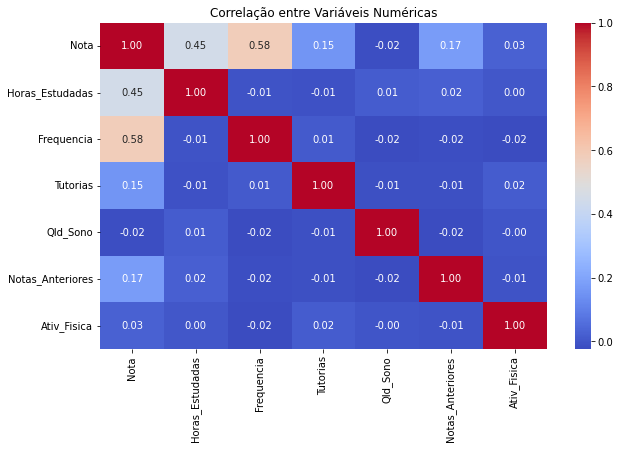

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Carregando dados (supondo que você já tenha feito o join e leitura da tabela ouro)
df = spark.table("fato_Desempenho_completo").toPandas()

# Filtrando apenas colunas numéricas
num_cols = ['Nota', 'Horas_Estudadas', 'Frequencia', 'Tutorias', 'Qld_Sono', 'Notas_Anteriores', 'Ativ_Fisica']
correlation_matrix = df[num_cols].corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()


Verificando distribuição das tutorias para alunos na categoria de notas HIGH

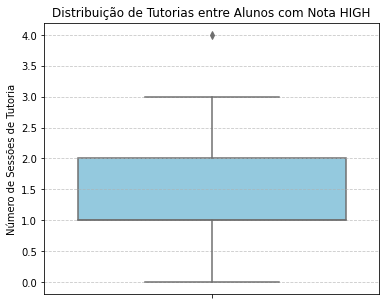

In [0]:
# Filtrando apenas alunos com Categ_Nota HIGH
df_high = df[df['Categ_Nota'] == 'HIGH']

# Criando o boxplot de Tutorias
plt.figure(figsize=(6, 5))
sns.boxplot(y='Tutorias', data=df_high, color='skyblue')
plt.title('Distribuição de Tutorias entre Alunos com Nota HIGH')
plt.ylabel('Número de Sessões de Tutoria')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Verificando distribuição da frequencia para alunos na categoria de notas HIGH

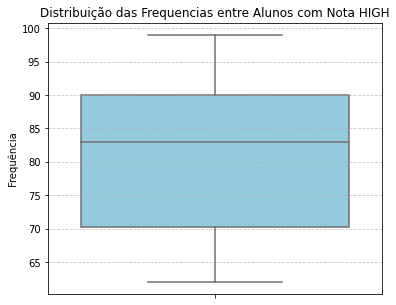

In [0]:
# Criando o boxplot de Frequência
plt.figure(figsize=(6, 5))
sns.boxplot(y='Frequencia', data=df_high, color='skyblue')
plt.title('Distribuição das Frequencias entre Alunos com Nota HIGH')
plt.ylabel('Frequência')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Verificando distribuição das horas de sono para alunos na categoria de notas HIGH

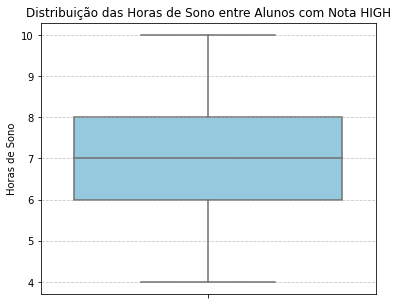

In [0]:
# Criando o boxplot de Qualidade/Horas de Sono
plt.figure(figsize=(6, 5))
sns.boxplot(y='Qld_Sono', data=df_high, color='skyblue')
plt.title('Distribuição das Horas de Sono entre Alunos com Nota HIGH')
plt.ylabel('Horas de Sono')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Verificando distribuição de notas anteriores para alunos na categoria de notas HIGH

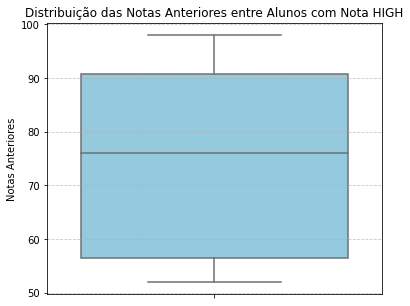

In [0]:
# Criando o boxplot de Notas Anteriores
plt.figure(figsize=(6, 5))
sns.boxplot(y='Notas_Anteriores', data=df_high, color='skyblue')
plt.title('Distribuição das Notas Anteriores entre Alunos com Nota HIGH')
plt.ylabel('Notas Anteriores')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

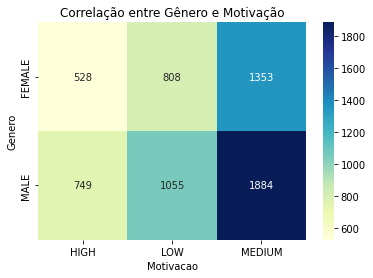

In [0]:
# Verificando correlação entre Gênero e Motivação para alunos no geral

# Tabela cruzada
ct = pd.crosstab(df['Genero'], df['Motivacao'])

# Heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Gênero e Motivação')
plt.show()


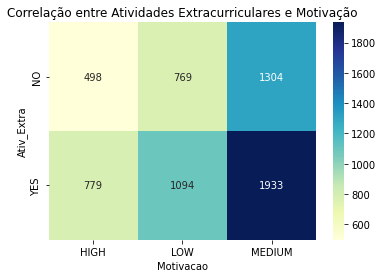

In [0]:
# Verificando correlação entre Atividade Extracurricular e Motivação para alunos no geral

# Tabela cruzada
ct = pd.crosstab(df['Ativ_Extra'], df['Motivacao'])

# Heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Atividades Extracurriculares e Motivação')
plt.show()

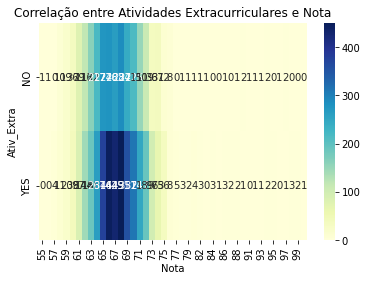

In [0]:
import seaborn as sns

# Verificando correlação entre Atividade Extracurricular e Nota para alunos no geral

# Tabela cruzada
ct = pd.crosstab(df['Ativ_Extra'], df['Nota'])

# Heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Atividades Extracurriculares e Nota')
plt.show()

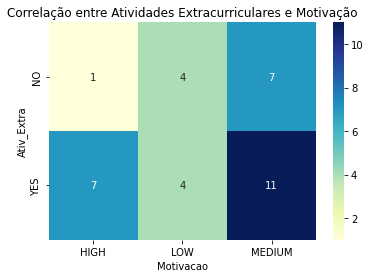

In [0]:
# Tabela cruzada

# Verificando correlação entre Atividade Extracurricular e Motivação para alunos HIGH

ct = pd.crosstab(df_high['Ativ_Extra'], df_high['Motivacao'])

# Heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Atividades Extracurriculares e Motivação')
plt.show()

Verificando correlação entre Dificuldade de Aprendizado e Nota para alunos no geral e alunos HIGH

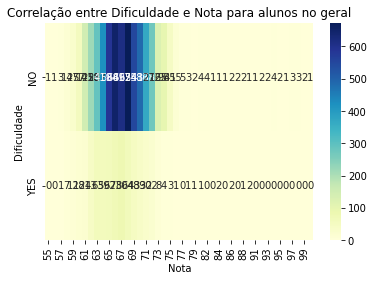

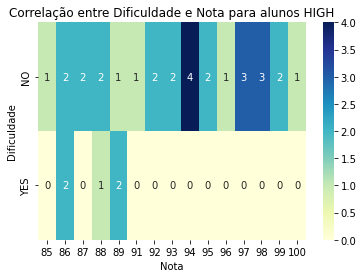

In [0]:
# Tabela cruzada para todos
ct = pd.crosstab(df['Dificuldade'], df['Nota'])

# Heatmap para todos
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Dificuldade e Nota para alunos no geral')
plt.show()

# Tabela cruzada para HIGH
ct = pd.crosstab(df_high['Dificuldade'], df_high['Nota'])

# Heatmap para HIGH
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Dificuldade e Nota para alunos HIGH')
plt.show()

Verificando correlação entre Tipo de Escola e Nota para alunos no geral e alunos HIGH

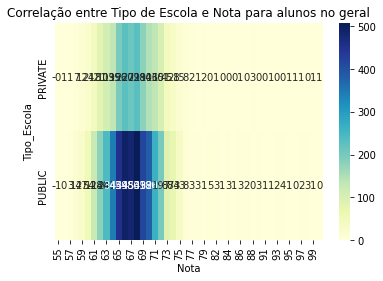

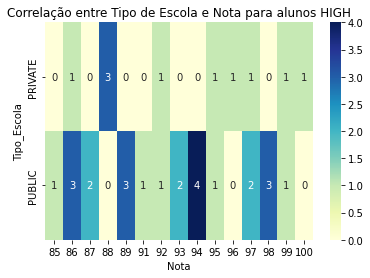

In [0]:
# Tabela cruzada para todos
ct = pd.crosstab(df['Tipo_Escola'], df['Nota'])

# Heatmap para todos
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Tipo de Escola e Nota para alunos no geral')
plt.show()

# Tabela cruzada para HIGH
ct = pd.crosstab(df_high['Tipo_Escola'], df_high['Nota'])

# Heatmap para HIGH
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Tipo de Escola e Nota para alunos HIGH')
plt.show()

Verificando divisão dos alunos em tipo de Escola

In [0]:
# Agrupando por tipo de escola
qtd_por_tipo = df['Tipo_Escola'].value_counts()
porcentagem_por_tipo = df['Tipo_Escola'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)


         Qtd_Alunos  Porcentagem (%)
PUBLIC         4433            69.52
PRIVATE        1944            30.48


Verificando divisão de alunos por Acesso a Internet

In [0]:
# Agrupando por acesso a internet 
qtd_por_tipo = df['Acesso_Internet'].value_counts()
porcentagem_por_tipo = df['Acesso_Internet'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)


     Qtd_Alunos  Porcentagem (%)
YES        5893            92.41
NO          484             7.59


- Verificando divisão de alunos por Distância da Escola

In [0]:
# Agrupando por distancia da escola para casa
qtd_por_tipo = df['Escola_Casa'].value_counts()
porcentagem_por_tipo = df['Escola_Casa'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)

          Qtd_Alunos  Porcentagem (%)
NEAR            3801            59.60
MODERATE        1940            30.42
FAR              636             9.97


Verificando divisão de alunos por Distância da Escola

In [0]:
# Agrupando por Qualidade dos professores
qtd_por_tipo = df['Qld_Professores'].value_counts()
porcentagem_por_tipo = df['Qld_Professores'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)

        Qtd_Alunos  Porcentagem (%)
MEDIUM        3826            60.00
HIGH          1904            29.86
LOW            647            10.15


Verificando divisão de alunos por Acesso aos Recursos

In [0]:
# Agrupando por acesso a recursos
qtd_por_tipo = df['Acesso_Recursos'].value_counts()
porcentagem_por_tipo = df['Acesso_Recursos'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)


        Qtd_Alunos  Porcentagem (%)
MEDIUM        3203            50.23
HIGH          1900            29.79
LOW           1274            19.98


Verificando divisão de alunos por Nível de Educação dos Pais

In [0]:
# Agrupando por acesso a recursos
qtd_por_tipo = df['Educa_Pais'].value_counts()
porcentagem_por_tipo = df['Educa_Pais'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)

              Qtd_Alunos  Porcentagem (%)
HIGH SCHOOL         3158            49.52
COLLEGE             1939            30.41
POSTGRADUATE        1280            20.07


Verificando divisão de alunos por Situação Financeira da Família


In [0]:
# Agrupando por acesso a recursos
qtd_por_tipo = df['Sit_Financeira'].value_counts()
porcentagem_por_tipo = df['Sit_Financeira'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)

        Qtd_Alunos  Porcentagem (%)
LOW           2582            40.49
MEDIUM        2566            40.24
HIGH          1229            19.27


Verificando divisão de alunos por Suporte Fornecido pelos Pais

In [0]:
# Agrupando por acesso a recursos
qtd_por_tipo = df['Suporte_Pais'].value_counts()
porcentagem_por_tipo = df['Suporte_Pais'].value_counts(normalize=True) * 100

# Exibindo como DataFrame combinado
resumo = pd.DataFrame({
    'Qtd_Alunos': qtd_por_tipo,
    'Porcentagem (%)': porcentagem_por_tipo.round(2)
})

print(resumo)

        Qtd_Alunos  Porcentagem (%)
MEDIUM        3251            50.98
HIGH          1836            28.79
LOW           1290            20.23


Verificando correlação entre o nível de Suporte dos Pais e Nota para alunos no geral e alunos HIGH

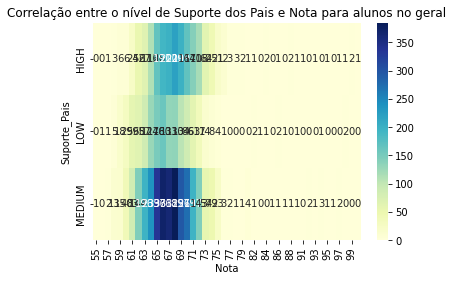

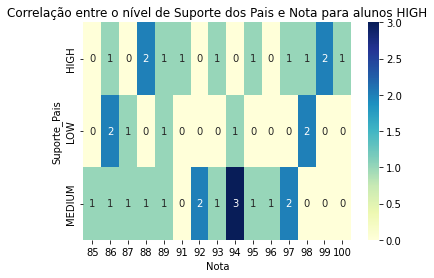

In [0]:
# Tabela cruzada para todos
ct = pd.crosstab(df['Suporte_Pais'], df['Nota'])

# Heatmap para todos
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre o nível de Suporte dos Pais e Nota para alunos no geral')
plt.show()

# Tabela cruzada para HIGH
ct = pd.crosstab(df_high['Suporte_Pais'], df_high['Nota'])

# Heatmap para HIGH
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre o nível de Suporte dos Pais e Nota para alunos HIGH')
plt.show()

Fazendo mais uma análise para avaliar melhor as Atividades Extracurriculares

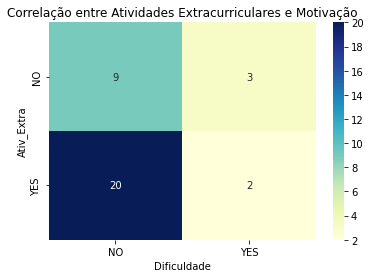

In [0]:
# Tabela cruzada

# Verificando correlação entre Atividade Extracurricular e Dificuldade para alunos HIGH

ct = pd.crosstab(df_high['Ativ_Extra'], df_high['Dificuldade'])

# Heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Correlação entre Atividades Extracurriculares e Motivação')
plt.show()